## Star Wars Movie Survey Results
This project analyses the data gathered by the team at FiveThirtyEight, who surveyed Star Wars fans using the online tool SurveyMonkey.  
Survey results are available at their [GitHub repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey)

### Outline
1) Data Cleaning  
2) Data Exploration
- Most Watched Movie
- Highest Ranked Movie
- Fan Moment
- Most Liked Characters
- Age wise Analysis

<hr style="border-top: 2px solid blue; margin-top: 1px; margin-bottom: 1px"></hr>

In [1]:
import numpy as np

import pandas as pd
pd.set_option("display.max_rows", 20)
pd.set_option("display.max_columns", 100)
pd.set_option("display.precision", 2)

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

import seaborn as sns
sns.set_style("darkgrid")    
sns.set_context("talk", font_scale = 1.2 )    

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
star_wars = pd.read_csv("StarWars.csv", encoding="ISO-8859-1")

In [3]:
star_wars.shape

(1187, 38)

In [4]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.29e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.29e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.29e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.29e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


### Data Cleaning

#### Renaming Columns

In [5]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [6]:
star_wars.rename(columns={'Have you seen any of the 6 films in the Star Wars franchise?':'seen_or_not',
       'Do you consider yourself to be a fan of the Star Wars film franchise?':'fan_or_not',
       'Which of the following Star Wars films have you seen? Please select all that apply.':'seen_1',
       'Unnamed: 4':'seen_2', 'Unnamed: 5':'seen_3', 'Unnamed: 6':'seen_4', 'Unnamed: 7':'seen_5', 'Unnamed: 8':'seen_6',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.':'ranking_1',
       'Unnamed: 10':'ranking_2', 'Unnamed: 11':'ranking_3', 'Unnamed: 12':'ranking_4', 'Unnamed: 13':'ranking_5', 'Unnamed: 14':'ranking_6',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.':'Han Solo',
       'Unnamed: 16':'Luke Skywalker', 'Unnamed: 17':'Princess Leia', 'Unnamed: 18':'Anakin Skywalker', 'Unnamed: 19':'Obi Wan',
       'Unnamed: 20':'Palpatine', 'Unnamed: 21':'Darth Vader', 'Unnamed: 22':'Lando', 'Unnamed: 23':'Boba', 'Unnamed: 24':'C3P0', 'Unnamed: 25':'R2D2', 'Unnamed: 26':'JarJarBinks', 'Unnamed: 27':'Padme Amidala',
       'Unnamed: 28':'Yoda', 'Which character shot first?':'shot_first',
       'Are you familiar with the Expanded Universe?':'familiar_with_expandend_universe',
       'Do you consider yourself to be a fan of the Expanded Universe?æ':'fan_of_expanded_universe',
       'Do you consider yourself to be a fan of the Star Trek franchise?':'fan_of_star_trek_franchise',
       'Household Income':'Income', 'Location (Census Region)':'Location'}, inplace=True)

In [7]:
star_wars.columns

Index(['RespondentID', 'seen_or_not', 'fan_or_not', 'seen_1', 'seen_2',
       'seen_3', 'seen_4', 'seen_5', 'seen_6', 'ranking_1', 'ranking_2',
       'ranking_3', 'ranking_4', 'ranking_5', 'ranking_6', 'Han Solo',
       'Luke Skywalker', 'Princess Leia', 'Anakin Skywalker', 'Obi Wan',
       'Palpatine', 'Darth Vader', 'Lando', 'Boba', 'C3P0', 'R2D2',
       'JarJarBinks', 'Padme Amidala', 'Yoda', 'shot_first',
       'familiar_with_expandend_universe', 'fan_of_expanded_universe',
       'fan_of_star_trek_franchise', 'Gender', 'Age', 'Income', 'Education',
       'Location'],
      dtype='object')

In [8]:
star_wars.drop(index=0, inplace=True)

In [9]:
star_wars.head(4)

,RespondentID,seen_or_not,fan_or_not,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6,Han Solo,Luke Skywalker,Princess Leia,Anakin Skywalker,Obi Wan,Palpatine,Darth Vader,Lando,Boba,C3P0,R2D2,JarJarBinks,Padme Amidala,Yoda,shot_first,familiar_with_expandend_universe,fan_of_expanded_universe,fan_of_star_trek_franchise,Gender,Age,Income,Education,Location
1,3.29e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.29e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.29e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.29e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


#### Changing 'Seen' Column Values to Yes/No

In [10]:
star_wars[star_wars['seen_or_not'] == 'No'].head()

,RespondentID,seen_or_not,fan_or_not,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6,Han Solo,Luke Skywalker,Princess Leia,Anakin Skywalker,Obi Wan,Palpatine,Darth Vader,Lando,Boba,C3P0,R2D2,JarJarBinks,Padme Amidala,Yoda,shot_first,familiar_with_expandend_universe,fan_of_expanded_universe,fan_of_star_trek_franchise,Gender,Age,Income,Education,Location
2,3.29e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
12,3.29e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,3.29e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",High school degree,East South Central
35,3.29e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,30-44,"$50,000 - $99,999",Graduate degree,East South Central
47,3.29e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Male,18-29,"$0 - $24,999",High school degree,Pacific


When someone has not seen the movies, they are not in a position to respond to any other questions except questions not directly related to star wars, hence the responses are 'Nan'.  
But wherever seen_or_not is 'No', we can also mark other seen columns(for each movie) as 'No' as well.  

In [11]:
seen_cols = [col for col in star_wars.columns if col.startswith('seen')]

In [12]:
bool_map = {'Star Wars: Episode I  The Phantom Menace':'Yes', np.NaN:'No'}
star_wars['seen_1'] = star_wars['seen_1'].map(bool_map)

bool_map = {'Star Wars: Episode II  Attack of the Clones':'Yes', np.NaN:'No'}
star_wars['seen_2'] = star_wars['seen_2'].map(bool_map)

bool_map = {'Star Wars: Episode III  Revenge of the Sith':'Yes', np.NaN:'No'}
star_wars['seen_3'] = star_wars['seen_3'].map(bool_map)

bool_map = {'Star Wars: Episode IV  A New Hope':'Yes', np.NaN:'No'}
star_wars['seen_4'] = star_wars['seen_4'].map(bool_map)

bool_map = {'Star Wars: Episode V The Empire Strikes Back':'Yes', np.NaN:'No'}
star_wars['seen_5'] = star_wars['seen_5'].map(bool_map)

bool_map = {'Star Wars: Episode VI Return of the Jedi':'Yes', np.NaN:'No'}
star_wars['seen_6'] = star_wars['seen_6'].map(bool_map)

In [13]:
star_wars.head(4)

,RespondentID,seen_or_not,fan_or_not,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6,Han Solo,Luke Skywalker,Princess Leia,Anakin Skywalker,Obi Wan,Palpatine,Darth Vader,Lando,Boba,C3P0,R2D2,JarJarBinks,Padme Amidala,Yoda,shot_first,familiar_with_expandend_universe,fan_of_expanded_universe,fan_of_star_trek_franchise,Gender,Age,Income,Education,Location
1,3.29e+09,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.29e+09,No,NaN,No,No,No,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.29e+09,Yes,No,Yes,Yes,Yes,No,No,No,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.29e+09,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


#### Changing 'Ranking' ColumnType to Float

In [14]:
ranking_cols = [col for col in star_wars.columns if col.startswith('ranking')]

for col in ranking_cols:
    star_wars[col] = star_wars[col].astype(float)

### Data Exploration

In [15]:
star_wars['seen_or_not'].value_counts(normalize=True)*100

Yes    78.92
No     21.08
Name: seen_or_not, dtype: float64

~79% of respondents have seen atleast one of the 6 films.

Let's focus of respondents who have seen one or more films

In [16]:
star_wars_seen = star_wars[star_wars['seen_or_not'] == 'Yes'].copy()

In [17]:
star_wars_seen.head(3)

,RespondentID,seen_or_not,fan_or_not,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6,Han Solo,Luke Skywalker,Princess Leia,Anakin Skywalker,Obi Wan,Palpatine,Darth Vader,Lando,Boba,C3P0,R2D2,JarJarBinks,Padme Amidala,Yoda,shot_first,familiar_with_expandend_universe,fan_of_expanded_universe,fan_of_star_trek_franchise,Gender,Age,Income,Education,Location
1,3.29e+09,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,3.0,2.0,1.0,4.0,5.0,6.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
3,3.29e+09,Yes,No,Yes,Yes,Yes,No,No,No,1.0,2.0,3.0,4.0,5.0,6.0,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.29e+09,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,5.0,6.0,1.0,2.0,4.0,3.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [18]:
star_wars_seen.columns

Index(['RespondentID', 'seen_or_not', 'fan_or_not', 'seen_1', 'seen_2',
       'seen_3', 'seen_4', 'seen_5', 'seen_6', 'ranking_1', 'ranking_2',
       'ranking_3', 'ranking_4', 'ranking_5', 'ranking_6', 'Han Solo',
       'Luke Skywalker', 'Princess Leia', 'Anakin Skywalker', 'Obi Wan',
       'Palpatine', 'Darth Vader', 'Lando', 'Boba', 'C3P0', 'R2D2',
       'JarJarBinks', 'Padme Amidala', 'Yoda', 'shot_first',
       'familiar_with_expandend_universe', 'fan_of_expanded_universe',
       'fan_of_star_trek_franchise', 'Gender', 'Age', 'Income', 'Education',
       'Location'],
      dtype='object')

#### Most Watched Movie

In [19]:
sw_seen = star_wars_seen[['seen_1','seen_2','seen_3','seen_4','seen_5','seen_6']]

In [20]:
sw_seen = sw_seen.stack().to_frame()
sw_seen.reset_index(inplace=True)
sw_seen

,level_0,level_1,0
0,1,seen_1,Yes
1,1,seen_2,Yes
2,1,seen_3,Yes
3,1,seen_4,Yes
4,1,seen_5,Yes
...,...,...,...
5611,1186,seen_2,Yes
5612,1186,seen_3,No
5613,1186,seen_4,No
5614,1186,seen_5,Yes


In [21]:
sw_seen.rename(columns={'level_1':'movie_seen',0:'Yes/No'}, inplace=True)

sw_seen.drop('level_0', axis=1, inplace=True)

sw_seen['count'] = 1

sw_seen.head()

,movie_seen,Yes/No,count
0,seen_1,Yes,1
1,seen_2,Yes,1
2,seen_3,Yes,1
3,seen_4,Yes,1
4,seen_5,Yes,1


In [22]:
sw_seen = sw_seen.pivot_table(index='movie_seen', columns='Yes/No', values='count', aggfunc='sum')

In [23]:
sw_seen

Yes/No,No,Yes
movie_seen,,
seen_1,263,673
seen_2,365,571
seen_3,386,550
seen_4,329,607
seen_5,178,758
seen_6,198,738


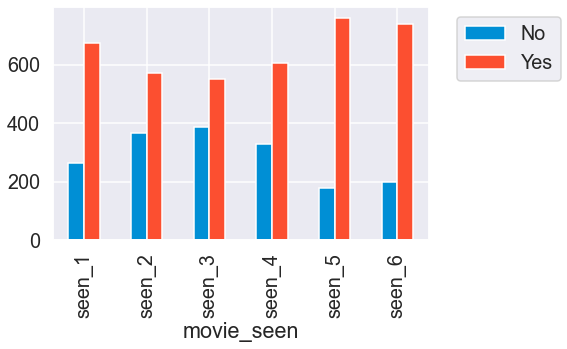

In [24]:
sw_seen.plot.bar()
plt.legend(bbox_to_anchor = (1.05, 1), borderaxespad=0.5);

'Star Wars: Episode V The Empire Strikes Back' is the most watched movie in the franchise.

#### Highest Ranked Movie

In [25]:
for col in ranking_cols:
    print(col,':',round(star_wars_seen[col].mean(),2))

ranking_1 : 3.73
ranking_2 : 4.09
ranking_3 : 4.34
ranking_4 : 3.27
ranking_5 : 2.51
ranking_6 : 3.05


Yes/No,No,Yes
movie_seen,,
seen_1,263,673
seen_2,365,571
seen_3,386,550
seen_4,329,607
seen_5,178,758
seen_6,198,738


'Star Wars: Episode V The Empire Strikes Back' is also the highest ranked film, while 'Star Wars: Episode III  Revenge of the Sith' the lowest ranked.

#### Fan Moment

In [26]:
star_wars_seen['fan_or_not'].value_counts(normalize=True)*100

Yes    66.03
No     33.97
Name: fan_or_not, dtype: float64

66% of respondents who have seen the movie are fan of franchise

In [27]:
print('Male Fans\n')
print(star_wars_seen['fan_or_not'][star_wars_seen['Gender'] == 'Male'].value_counts(normalize=True)*100)
print('\nFemale Fans\n')
print(star_wars_seen['fan_or_not'][star_wars_seen['Gender'] == 'Female'].value_counts(normalize=True)*100)

Male Fans

Yes    71.63
No     28.37
Name: fan_or_not, dtype: float64

Female Fans

Yes    59.95
No     40.05
Name: fan_or_not, dtype: float64


70% of Males are fans, while 60% of Females are fans.

In [28]:
star_wars_seen['fan_of_star_trek_franchise'].value_counts(normalize=True)*100

Yes    50.12
No     49.88
Name: fan_of_star_trek_franchise, dtype: float64

Comparetively, only 50% of these respondents are fan of star trek franchise.

In [29]:
star_wars_seen['fan_of_expanded_universe'][star_wars_seen['fan_or_not'] == 'Yes'].value_counts(normalize=True)*100

Yes    50.27
No     49.73
Name: fan_of_expanded_universe, dtype: float64

Also, only 50% of fans of original franchise movies are also fans of expanded universe.  
Seems despite the hype of the expanded universe with new and interesting characters, people does not seem to like the movies in here much

#### Most Liked Characters

In [30]:
star_wars_characters = ['Han Solo', 'Luke Skywalker', 'Princess Leia', 'Anakin Skywalker', 'Obi Wan', 'Palpatine', 'Darth Vader', 'Lando', 'Boba', 'C3P0', 'R2D2',
       'JarJarBinks', 'Padme Amidala', 'Yoda']

In [31]:
sw_characters = star_wars_seen[star_wars_characters]

In [32]:
sw_characters = sw_characters.stack().to_frame()
sw_characters.reset_index(inplace=True)
sw_characters

,level_0,level_1,0
0,1,Han Solo,Very favorably
1,1,Luke Skywalker,Very favorably
2,1,Princess Leia,Very favorably
3,1,Anakin Skywalker,Very favorably
4,1,Obi Wan,Very favorably
...,...,...,...
11524,1186,C3P0,Somewhat favorably
11525,1186,R2D2,Somewhat favorably
11526,1186,JarJarBinks,Very unfavorably
11527,1186,Padme Amidala,Neither favorably nor unfavorably (neutral)


In [33]:
sw_characters.rename(columns={'level_1':'characters',0:'Likability'}, inplace=True)

sw_characters.drop('level_0', axis=1, inplace=True)

sw_characters['count'] = 1

sw_characters.head()

,characters,Likability,count
0,Han Solo,Very favorably,1
1,Luke Skywalker,Very favorably,1
2,Princess Leia,Very favorably,1
3,Anakin Skywalker,Very favorably,1
4,Obi Wan,Very favorably,1


In [34]:
sw_characters = sw_characters.pivot_table(index='characters', columns='Likability', values='count', aggfunc='sum')
sw_characters

Likability,Neither favorably nor unfavorably (neutral),Somewhat favorably,Somewhat unfavorably,Unfamiliar (N/A),Very favorably,Very unfavorably
characters,,,,,,
Anakin Skywalker,135,269,83,52,245,39
Boba,248,153,96,132,138,45
C3P0,79,229,23,15,474,7
Darth Vader,84,171,102,10,310,149
Han Solo,44,151,8,15,610,1
JarJarBinks,164,130,102,109,112,204
Lando,236,223,63,148,142,8
Luke Skywalker,38,219,13,6,552,3
Obi Wan,43,159,8,17,591,7


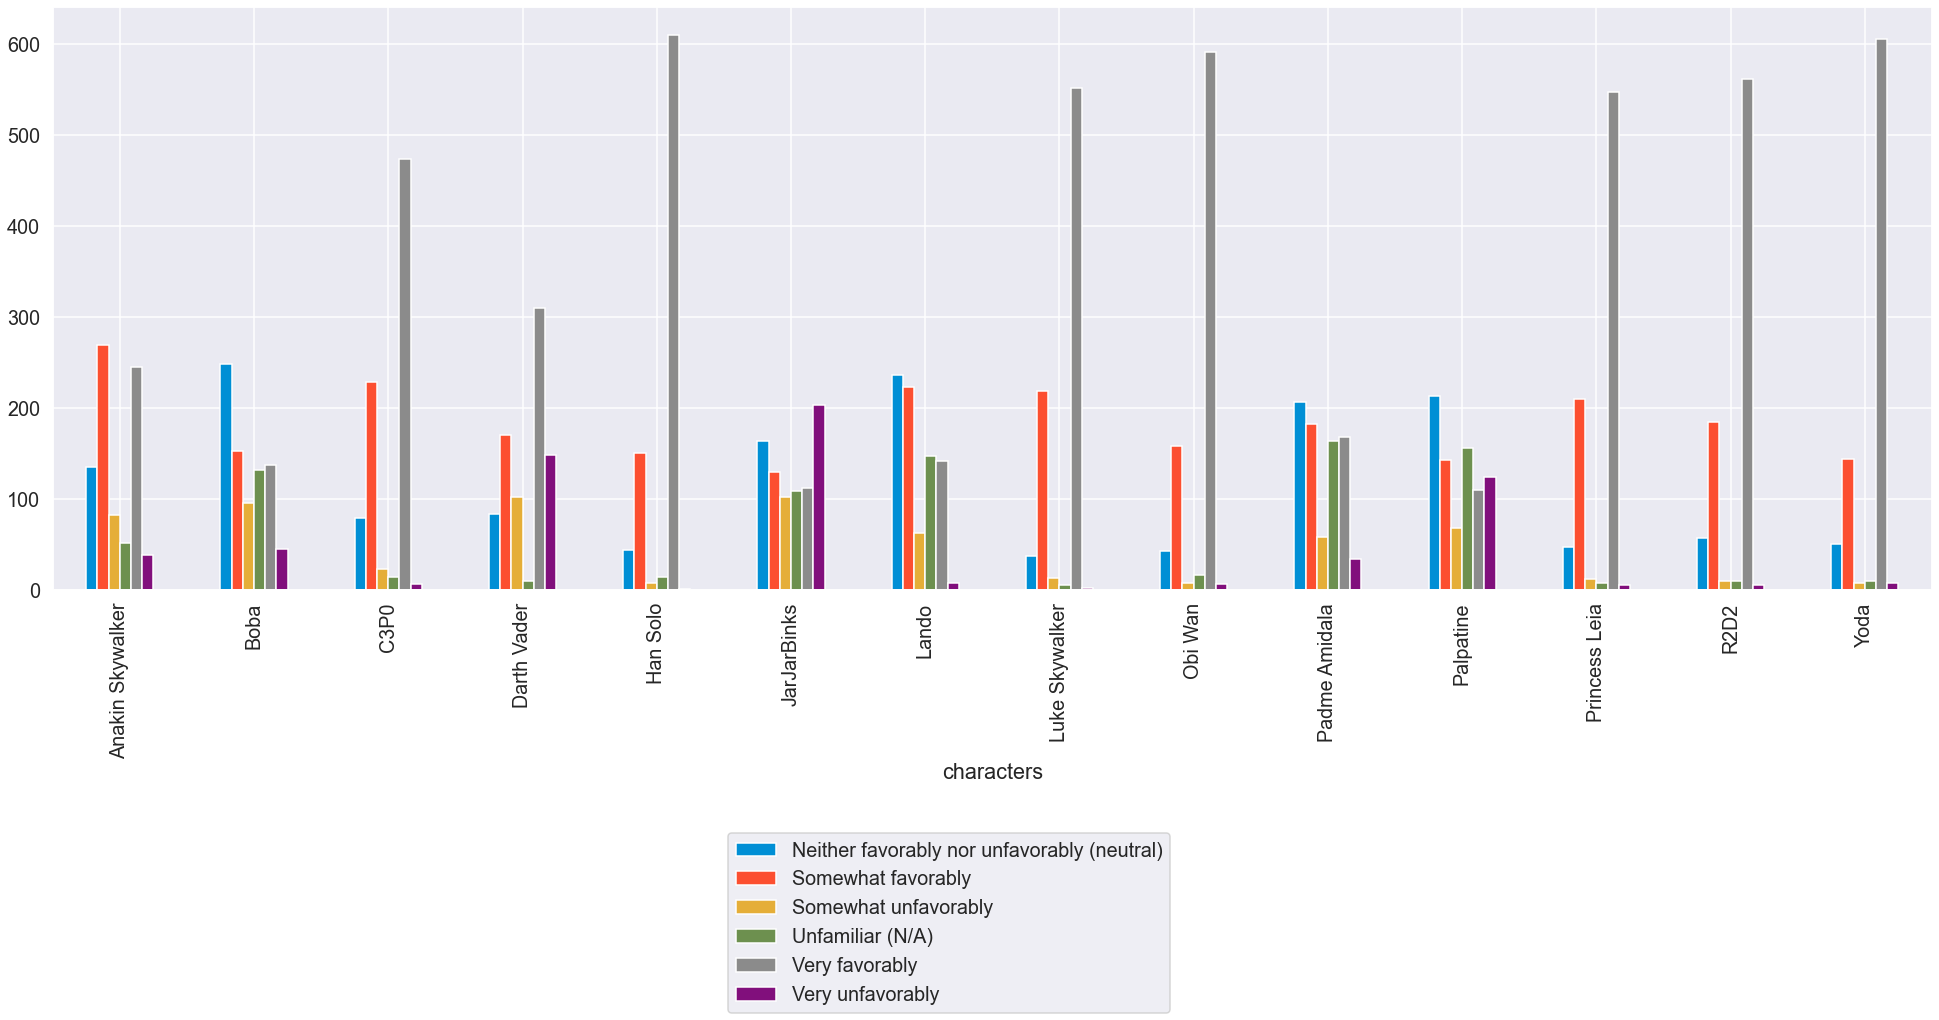

In [35]:
sw_characters.plot.bar(figsize=(30,10))
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor = (0.6,-0.4), borderaxespad=0.5);

Hans Solo is the most liked character, closely followed by Yoda and Obi Wan.  
JarJarBinks is the most unliked character, even more than likes of Darth Vader and Emperor Palpatine.

#### Age wise Analysis

In [46]:
star_wars_seen['Age'][star_wars_seen['fan_or_not'] == 'Yes'].value_counts().sort_index() / star_wars_seen['Age'].value_counts().sort_index()

18-29    0.69
30-44    0.72
45-60    0.64
> 60     0.59
Name: Age, dtype: float64

~70% of Young and Middle Age population seems to like the franchise. Percentage seems to decrease with age afterwards.

In [47]:
star_wars_seen['Age'][star_wars_seen['fan_of_expanded_universe'] == 'Yes'].value_counts().sort_index() / star_wars_seen['Age'].value_counts().sort_index()

18-29    0.17
30-44    0.13
45-60    0.09
> 60     0.10
Name: Age, dtype: float64

In every age group, a very small percentage seems to like the expanded franchise

Respondents from East North Central, Pacific and South Atlantic seem to be the loyal base for franchise.  
Interestingly, biggest difference is seen between East North and East South.